In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import binom
from scipy.stats import norm

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/siga-aneel/siga-empreendimentos-geracao.csv
/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


In [52]:
dados = pd.read_csv('/kaggle/input/siga-aneel/siga-empreendimentos-geracao.csv', usecols = lambda x: x != '_id')
dados.head(2)

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,2023-03-01,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1400,",00",Não,"-20,12479858","-43,87020250",2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI Cï¿½RREGO DO Sï¿½T...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
1,2023-03-01,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,3972,",00",Não,"-20,13187300","-43,87693500",2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI Cï¿½RREGO DO Sï¿½T...,41 - Das Velhas - Sao Francisco,Nova Lima - MG


Lembrando que:

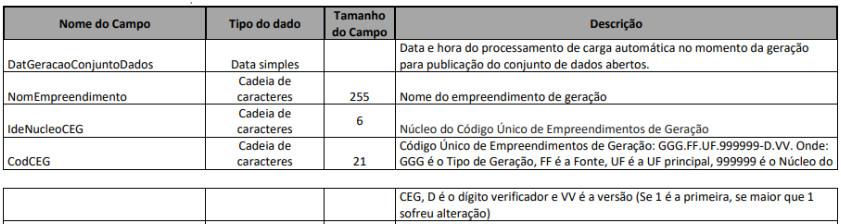
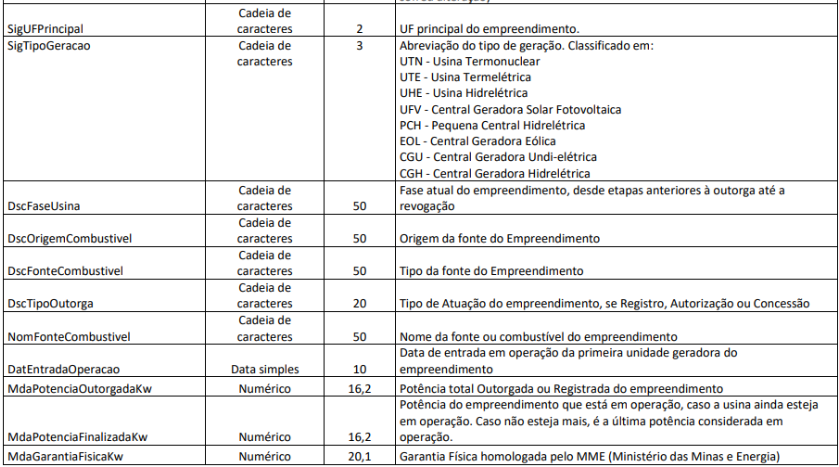
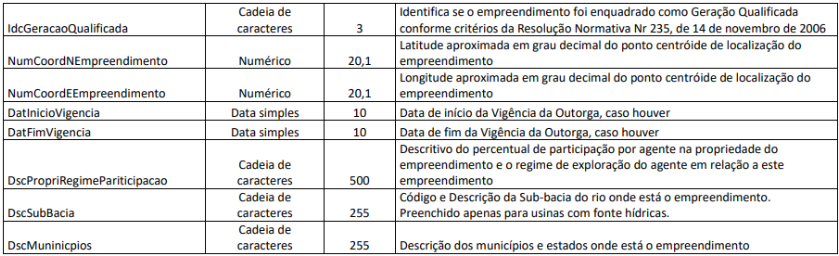

In [53]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24439 entries, 0 to 24438
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   DatGeracaoConjuntoDados       24439 non-null  object
 1   NomEmpreendimento             24439 non-null  object
 2   IdeNucleoCEG                  24439 non-null  int64 
 3   CodCEG                        24439 non-null  object
 4   SigUFPrincipal                24439 non-null  object
 5   SigTipoGeracao                24439 non-null  object
 6   DscFaseUsina                  24439 non-null  object
 7   DscOrigemCombustivel          24439 non-null  object
 8   DscFonteCombustivel           24439 non-null  object
 9   DscTipoOutorga                24439 non-null  object
 10  NomFonteCombustivel           24439 non-null  object
 11  DatEntradaOperacao            24439 non-null  object
 12  MdaPotenciaOutorgadaKw        24439 non-null  object
 13  MdaPotenciaFisca

# Problema A:

A proporção de Usinas Solar Fotovoltaicas (UFV) presentes no parque gerador nacional, é um pouco maior do que 75%. Considerando os outros tipos de usina como ‘Não UFV’, qual a probabilidade de selecionar aleatoriamente um grupo de 10 usinas que apresente uma proporção semelhante à da população?

In [54]:
dados.SigTipoGeracao.value_counts(normalize = True)

UFV    0.753959
UTE    0.127542
EOL    0.058145
CGH    0.029338
PCH    0.021932
UHE    0.008961
UTN    0.000123
Name: SigTipoGeracao, dtype: float64

Ao determinar que só teria 2 tipos de usina, posso tentar usar a Distribuição Binomial. Além disso, a escolha das usinas ocorreria de forma independente, ou seja, a escolha de uma, não influencia a escolha da próxima.

Tenho à disposição a quantidade de eventos que desejo ter sucesso, o número de ensaios e a probabilidade de sucesso.


In [55]:
# Total de eventos que se deseja obter sucesso:
k = 7 

# Número de ensaios:
n = 10

# Probabilidade de sucesso:
p = 0.753959

In [56]:
probabilidade = binom.pmf(k, n, p)
print('%0.5f' % (probabilidade))

0.24754


Usando o método *binom.pmf* do *Scipy*, chego a probabilidade de 24,75% de obter um grupo que respeite as condições do enunciado.

---

# Problema B:

Ainda sobre a questão anterior, quantos grupos de 10 usinas será preciso selecionar, de forma aleatória, para conseguir 100 grupos compostos por 7 usinas UFV e 3 'Não UFV'?

Será preciso selecionar mais do que 100 grupos para obter a quantidade que respeita as configurações do enunciado, para tanto, posso usar a Distribuição Binomial, aplicando a probabilidade encontrada no problema anterior.

## $$\mu=n*p$$

In [57]:
n = 100 / probabilidade
n

403.9821677646986

Não conseguimos obter grupos fracionados de usinas, portanto, faço o arredondamento deste valor:

In [58]:
n = int(n.round())
n

404

Temos que fazer 404 vezes a seleção de usinas para ter uma média de 100 grupos compostos por 7 usinas UFV e 3 'Não UFV'.

---

# Problema C:

Tenho que fazer um estudo para avaliar o **preço de automóveis**. Para isso, preciso realizar uma pesquisa de campo. Após reunião com meu supervisor fictício, foi possível elencar o seguinte conjunto de informações:

- Tenho somente **R$ 30.000,00** de recursos para realização da pesquisa de campo; e

- Seria interessante uma **margem de erro** não superior a **10%** em relação a **média estimada**.


Em estudos deste tipo, o **custo médio por entrevista, fica em torno de R$95,00**. Com este conjunto de fatos, preciso avaliar e obter as seguintes informações:

In [59]:
dados_price = pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')
dados_price

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


## Item 1:

Para obter uma estimativa para os parâmetros da população (preço dos automóveis), realize uma amostragem aleatória simples no conjunto de dados. Essa amostra deve conter 300 elementos, obtenha a média e o desvio-padrão dessa amostra.

In [60]:
recursos = 30000
custo_entrevista = 95

In [61]:
carros = dados_price.Price.sample(n = 300, random_state = 123)

# Média da amostra:
media_amostra = carros.mean()
media_amostra

17457.6

In [62]:
# Desvio padrão da amostra:
desvio_padrao_amostra = carros.std()
desvio_padrao_amostra

14669.909051704592

## Item 2:

Para a **margem de erro** especificada, obtenha os **tamanhos de amostra** necessários para garantir os **níveis de confiança** de **90%**, **95%** e **99%**.

### Margem de erro:

In [63]:
e = 0.1 * media_amostra
print('%0.2f' %(e))

1745.76


### Tamanho da amostra = 90%

In [64]:
0.5+(0.9/2)

0.95

In [65]:
Z = norm.ppf(0.95)
Z

1.6448536269514722

In [66]:
n_confianca_90 = (Z*(desvio_padrao_amostra/e))**2
n_confianca_90 = int(n_confianca_90.round())
print('Para um nível de confiança de 90%% devemos selecionar uma amostra de %s elementos.' % n_confianca_90)

Para um nível de confiança de 90% devemos selecionar uma amostra de 191 elementos.


### Tamanho da amostra = 95%

In [67]:
0.5+(0.95/2)

0.975

In [68]:
Z = norm.ppf(0.975)
Z

1.959963984540054

In [69]:
n_confianca_95 = (Z*(desvio_padrao_amostra/e))**2
n_confianca_95 = int(n_confianca_95.round())
print('Para um nível de confiança de 95%% devemos selecionar uma amostra de %s elementos.' % n_confianca_95)

Para um nível de confiança de 95% devemos selecionar uma amostra de 271 elementos.


### Tamanho da amostra = 99%

In [70]:
0.5+(0.99/2)

0.995

In [71]:
Z = norm.ppf(0.995)
Z

2.5758293035489004

In [72]:
n_confianca_99 = (Z*(desvio_padrao_amostra/e))**2
n_confianca_99 = int(n_confianca_99.round())
print('Para um nível de confiança de 99%% devemos selecionar uma amostra de %s elementos.' % n_confianca_99)

Para um nível de confiança de 99% devemos selecionar uma amostra de 469 elementos.


## Item 3:

Obtenha o **custo da pesquisa** para os três níveis de confiança.

In [73]:
custo_confianca_90 = n_confianca_90 * custo_entrevista
print('Para um nível de confiança de 90% o custo da pesquisa seria de R$ {:,.2f}.'.format(custo_confianca_90))

Para um nível de confiança de 90% o custo da pesquisa seria de R$ 18,145.00.


In [74]:
custo_confianca_95 = n_confianca_95 * custo_entrevista
print('Para um nível de confiança de 95% o custo da pesquisa seria de R$ {:,.2f}.'.format(custo_confianca_95))

Para um nível de confiança de 95% o custo da pesquisa seria de R$ 25,745.00.


In [75]:
custo_confianca_99 = n_confianca_99 * custo_entrevista
print('Para um nível de confiança de 99% o custo da pesquisa seria de R$ {:,.2f}.'.format(custo_confianca_99))

Para um nível de confiança de 99% o custo da pesquisa seria de R$ 44,555.00.


Diante os custos para cada tamanho de amostra, o maior Nível de Confiança que entra no orçamento da pesquisa é o de 95%.

## Item 4:

Para o maior nível de confiança viável (dentro do orçamento disponível), obtenha um **intervalo de confiança para a média da população**.

In [76]:
intervalo = norm.interval(alpha = 0.95, loc = media_amostra, scale = desvio_padrao_amostra / np.sqrt(n_confianca_95))
intervalo

(15711.010411580604, 19204.189588419395)

Ou seja, temos 95% de probabilidade dos carros estarem custando entre estes valores (15711.01, 19204.189).

## Item 5:

Assumindo o **nível de confiança** escolhido no item anterior, qual **margem de erro** pode ser considerada utilizando todo o recurso disponibilizado?

In [77]:
n_confianca_95 = recursos / custo_entrevista
n_confianca_95

315.7894736842105

O antigo Nível de Confiança era de 271.

In [78]:
Z = norm.ppf(.975)
e = Z * (desvio_padrao_amostra / np.sqrt(n_confianca_95))
e

1617.9931837125184

Anteriormente, o erro era de 1745.76.

In [79]:
e_percentual = e / media_amostra
e_percentual * 100
print('A nova margem de erro é {:.2f}%.'.format(e_percentual * 100))

A nova margem de erro é 9.27%.


## Item 6:

Assumindo um **nível de confiança** de **95%**, **quanto a pesquisa custaria**, caso fosse considerada uma **margem de erro** de apenas **5%** em relação à média estimada?

In [80]:
e = 0.05 * media_amostra
print('A margem de erro é de R$ %0.2f para mais ou para menos.' % (e))

A margem de erro é de R$ 872.88 para mais ou para menos.


Lembrando que, inicialmente, a taxa de erro era de R$1.745,76.

In [81]:
Z = norm.ppf(.975)
n_confianca_95 = (Z * (desvio_padrao_amostra / e)) ** 2
n_confianca_95 = int(n_confianca_95.round())
print('Para um nível de confiança de 95%% devemos selecionar uma amostra de %s elementos.' % n_confianca_95)

Para um nível de confiança de 95% devemos selecionar uma amostra de 1085 elementos.


In [83]:
custo_confianca_95 = n_confianca_95 * custo_entrevista
print('Para um nível de confiança de 95%, o custo da pesquisa seria de R$ {:,.2f}.'.format(custo_confianca_95))

Para um nível de confiança de 95%, o custo da pesquisa seria de R$ 103,075.00.


Mas, tenho a disposição apenas R$30.000,00 para realizar a pesquisa.